In [91]:
import pyprind
import pandas as pd
import numpy as np
import os
import nltk
import re
from nltk.corpus import stopwords
stop = stopwords.words('english')
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
# the Twitter message data is stored TWT Data1 CSV file and loaded to a dataframe df   (saved as UTF)
df=pd.read_csv('/Users/23behmen_t/Downloads/TWT Data1.csv')

In [74]:
df.head(11)

,Person ID,Message,Sentiment
0,1,I followed those and was not offered to speak ...,Neutral
1,2,"Hi, I paid my payment 2 days ago and would be ...",Negative
2,3,I just gotta let the world know. @CreditOneBan...,Negative
3,4,@NASCARSW42 @KyleLarsonRacin @CreditOneBank @c...,Positive
4,5,@NASCARSW42 @kyleLarsonRacin @CreditOneBank @c...,Negative
5,6,Checkered Flag! @JoshParker81 brings the No.42...,Positive
6,7,@NASCARSW42 @KyleLarsonRacin @CreditoneBgnk @c...,Neutral
7,8,"I called to complain about my card, i tried to...",Negative
8,9,ch@CocaColaRacing @CreditOneBank @NASCAR,Neutral
9,10,https: //twitter.com/JohnPaysor/status/1159533...,Neutral


In [75]:
df.dtypes

Person ID     int64
Message      object
Sentiment    object
dtype: object

In [76]:
df['Message']

0      I followed those and was not offered to speak ...
1      Hi, I paid my payment 2 days ago and would be ...
2      I just gotta let the world know. @CreditOneBan...
3      @NASCARSW42 @KyleLarsonRacin @CreditOneBank @c...
4      @NASCARSW42 @kyleLarsonRacin @CreditOneBank @c...
                             ...                        
306    Hi I'm currently traveling in europe but havin...
307    Hi, I need assistance with my account and I'm ...
308    I’m not sure this is the right place to ask th...
309    https://twitter.com/messages/med That’s just t...
310    Hello! i applied for your credit card and i’ve...
Name: Message, Length: 311, dtype: object

In [77]:
df['Message'].count

<bound method Series.count of 0      I followed those and was not offered to speak ...
1      Hi, I paid my payment 2 days ago and would be ...
2      I just gotta let the world know. @CreditOneBan...
3      @NASCARSW42 @KyleLarsonRacin @CreditOneBank @c...
4      @NASCARSW42 @kyleLarsonRacin @CreditOneBank @c...
                             ...                        
306    Hi I'm currently traveling in europe but havin...
307    Hi, I need assistance with my account and I'm ...
308    I’m not sure this is the right place to ask th...
309    https://twitter.com/messages/med That’s just t...
310    Hello! i applied for your credit card and i’ve...
Name: Message, Length: 311, dtype: object>

In [78]:
df.isnull().sum()

Person ID    0
Message      0
Sentiment    0
dtype: int64

In [79]:
# [0:] is length of the characters
# this is the way to finally find the string of the message for when using NLP
df.loc[10, 'Message'][0:]

"@CreditOneBank My card still hasn't shown up in the mail, it's been 9 days or so since being approved"

In [80]:
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    text = text.replace('â', '')

    return text

In [81]:
df['Message'] = df['Message'].apply(preprocessor)
df['Message']

0      i followed those and was not offered to speak ...
1      hi i paid my payment 2 days ago and would be c...
2      i just gotta let the world know creditonebank ...
3       nascarsw42 kylelarsonracin creditonebank clov...
4       nascarsw42 kylelarsonracin creditonebank clov...
                             ...                        
306    hi i m currently traveling in europe but havin...
307    hi i need assistance with my account and i m n...
308    i m not sure this is the right place to ask th...
309    https twitter com messages med that s just tod...
310    hello i applied for your credit card and i ve ...
Name: Message, Length: 311, dtype: object

In [82]:
#Using porterstemmer to tokenize all words to their stems
porter = PorterStemmer()

def tokenizer(text):
    return text.split()


def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [83]:
tokenizer('creditonebank my card still hasn t shown up in the mail it s been 9 days or so since being approved')

['creditonebank',
 'my',
 'card',
 'still',
 'hasn',
 't',
 'shown',
 'up',
 'in',
 'the',
 'mail',
 'it',
 's',
 'been',
 '9',
 'days',
 'or',
 'so',
 'since',
 'being',
 'approved']

In [84]:
# Applying stop words into the streams by iterating through string and only printing the nonstop words
[w for w in tokenizer('creditonebank my card still hasn t shown up in the mail it s been 9 days or so since being approved')[0:]
if w not in stop]

['creditonebank',
 'card',
 'still',
 'shown',
 'mail',
 '9',
 'days',
 'since',
 'approved']

In [89]:
count = CountVectorizer()
docs = np.array(df['Message'])
bag = count.fit_transform(docs)
bag.shape

(311, 1386)

In [93]:
tfidf = TfidfTransformer(use_idf=True, 
                         norm='l2', 
                         smooth_idf=True)
print(tfidf.fit_transform(count.fit_transform(docs)).toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [97]:
X_train = df.loc[:200, 'Message'].values
y_train = df.loc[:200, 'Sentiment'].values
X_test = df.loc[200:, 'Message'].values
y_test = df.loc[200:, 'Sentiment'].values

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)

param_grid = [{'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              {'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'vect__use_idf':[False],
               'vect__norm':[None],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              ]

lr_tfidf = Pipeline([('vect', tfidf),
                     ('clf', LogisticRegression(random_state=0))])

gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

In [105]:
gs_lr_tfidf.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/Users/23behmen_t/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.61731707 0.61695122
 0.64695122 0.63695122        nan        nan        nan        nan
 0.63756098 0.64195122 0.68170732 0.68182927        nan        nan
        nan        nan 0.63756098 0.62695122 0.67182927 0.68195122
        nan        nan        nan        nan 0.65695122 0.66670732
 0.66207317 0.64743902        nan        nan        nan        nan
 0.63743902 0.65682927 0.66719512 0.64719512        nan        nan
        nan        nan 0.63743902 0.65195122 0.66231707 0.65219512]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf',
                                        LogisticRegression(random_state=0))]),
             n_jobs=-1,
             param_grid=[{'clf__C': [1.0, 10.0, 100.0],
                          'clf__penalty': ['l1', 'l2'],
                          'vect__ngram_range': [(1, 1)],
                          'vect__stop_words': [['i', 'me', 'my', 'myself', 'we',
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd",...
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd", 'your',
           

In [106]:
print('Best parameter set: %s ' % gs_lr_tfidf.best_params_)
print('CV Accuracy: %.3f' % gs_lr_tfidf.best_score_)

Best parameter set: {'clf__C': 100.0, 'clf__penalty': 'l2', 'vect__ngram_range': (1, 1), 'vect__stop_words': None, 'vect__tokenizer': <function tokenizer_porter at 0x11d1c1940>} 
CV Accuracy: 0.682


In [108]:
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS

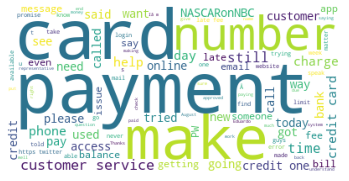

In [117]:
combined_text = " ".join([review for review in df['Message']])
# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=100,
        # update stopwords to include common words like the, in, was.....
        stopwords = STOPWORDS.update(['the','in','was','my','creditonebank','account','hi', 'Thank','Hello','will','now']))

# Generate and plot wordcloud
plt.imshow(wc.generate(combined_text))
plt.axis('off')
plt.show()